In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from skcriteria import Data, MIN, MAX

## Bring in data

In [4]:
health_path = "american_lung_county_health_data.csv"
fire_path = "MT_counties_extreme_fire_danger_shp"
res_path = '../shapefiles/MontanaReservations_shp/MontanReservations_4326.shp'
res_bounds = gpd.read_file(res_path)
df_health = pd.read_csv(health_path, skiprows=1)
df_health['County'] = df_health['County'].str.upper()
df_health = df_health[df_health['County'] != 'TOTAL:']
df_health['County'][df_health['County'] == 'LEWIS AND CLARK'] = 'LEWIS & CLARK'
df_health_norm = df_health.loc[:, df_health.columns != 'County'].div(df_health['Total Pop'], axis=0)  # normalize data by total population
df_health_norm['County'] = df_health['County']
df_fire = gpd.read_file(fire_path, geometry='geometry')
gdf = pd.merge(df_fire, df_health_norm, how='outer', left_on='NAME', right_on='County')
gdf = gdf.set_index('NAME')
gdf.drop(columns=['County'], inplace=True)
gdf.head()

fm100_3p_m  fm100_3p_1  fm100_3p_2  \
NAME                                               
CARBON         18.977833    8.485005   10.492827   
POWDER RIVER   17.838135    8.107280    9.730855   
MADISON        17.691097    8.728092    8.963005   
BEAVERHEAD     17.206333    8.556302    8.650031   
BIG HORN       19.279182    8.560492   10.718690   

                                                       geometry  Total Pop  \
NAME                                                                         
CARBON        POLYGON ((-108.7819959950193 45.63562204820308...        1.0   
POWDER RIVER  POLYGON ((-104.9819414905283 45.78524928331333...        1.0   
MADISON       POLYGON ((-112.0204908571746 45.85881059199459...        1.0   
BEAVERHEAD    POLYGON ((-113.5038680501889 45.94147411621572...        1.0   
BIG HORN      POLYGON ((-107.4249320250975 46.03975979589688...        1.0   

              Under 18  65 & Over  Pediatric Asthma  Adult Asthma      COPD  \
NAME                                                                          
CARBON        0.179506   0.248411          0.015333      0.073111  0.058901   
POWDER RIVER  0.167808   0.254566          0.014269      0.073630  0.059932   
MADISON       0.157554   0.290153          0.013456      0.074862  0.062630   
BEAVERHEAD    0.176807   0.215179          0.015158      0.074730  0.053000   
BIG HORN      0.342590   0.123802          0.029341      0.060105  0.038772   

              Lung Cancer  CV Disease  Diabetes  Poverty Estimate  
NAME                                                               
CARBON           0.000467    0.075449  0.075729          0.093399  
POWDER RIVER     0.000000    0.077055  0.077055          0.119292  
MADISON          0.000489    0.082324  0.080612          0.098471  
BEAVERHEAD       0.000424    0.065826  0.066250          0.131227  
BIG HORN         0.000449    0.045060  0.048054          0.264596

## Create scikit object for analysis

In [11]:
cols = ['fm100_3p_m', 'Under 18', '65 & Over', 'Pediatric Asthma', 'Adult Asthma',
    'COPD', 'Lung Cancer', 'CV Disease', 'Diabetes', 'Poverty Estimate']
data = gdf[cols]
crit = [MIN, MIN, MIN, MIN, MIN, MIN, MIN, MIN, MIN, MIN]
counties = data.index
cnms = data.columns
mtx = data.values
wts = [0.46, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06]
mca_data = Data(mtx, crit, anames=counties, cnames=cnms, weights=wts)

## MCA

In [12]:
from skcriteria.madm import closeness, simple
dm = closeness.TOPSIS()
dec = dm.decide(mca_data)
gdf['vulnerability'] = dec.e_.closeness
gdf['vul_rank'] = dec.rank_
gdf

fm100_3p_m  fm100_3p_1  fm100_3p_2  \
NAME                                                
CARBON          18.977833    8.485005   10.492827   
POWDER RIVER    17.838135    8.107280    9.730855   
MADISON         17.691097    8.728092    8.963005   
BEAVERHEAD      17.206333    8.556302    8.650031   
BIG HORN        19.279182    8.560492   10.718690   
STILLWATER      18.159038    8.228709    9.930328   
GALLATIN        17.916398    8.782743    9.133655   
SILVER BOW      18.213368    9.201823    9.011545   
CARTER          16.281518    7.589215    8.692303   
TREASURE        19.480058    8.598833   10.881225   
YELLOWSTONE     19.635925    8.682233   10.953692   
JEFFERSON       18.353812    9.024662    9.329151   
GOLDEN VALLEY   17.976552    8.310966    9.665586   
WHEATLAND       17.071788    8.055618    9.016171   
MUSSELSHELL     18.571145    8.458472   10.112673   
FALLON          16.128919    7.657129    8.471791   
ROSEBUD         18.979111    8.609232   10.369879   
GRANITE         18.434750    9.459689    8.975061   
CUSTER          18.252287    8.535010    9.717277   
MEAGHER         17.805668    8.673993    9.131675   
PRAIRIE         16.831873    8.280265    8.551608   
JUDITH BASIN    17.136678    8.259862    8.876816   
WIBAUX          15.340473    7.501689    7.838784   
PETROLEUM       18.318555    8.596956    9.721599   
MINERAL         20.876330   10.188350   10.687980   
CASCADE         17.927591    8.682258    9.245333   
FERGUS          17.281369    8.347166    8.934203   
DAWSON          15.513577    7.702876    7.810702   
GARFIELD        18.501632    8.779813    9.721820   
LAKE            20.624250   10.064922   10.559328   
MCCONE          16.404322    7.922447    8.481876   
TETON           17.479678    8.289553    9.190125   
RICHLAND        14.372869    6.934889    7.437980   
CHOUTEAU        17.934919    8.795432    9.139487   
SANDERS         21.330164   10.251632   11.078531   
PONDERA         17.587539    8.392059    9.195480   
ROOSEVELT       14.149901    7.003112    7.146789   
HILL            17.017104    8.502402    8.514703   
BLAINE          16.652674    8.167248    8.485425   
LIBERTY         17.123608    8.323240    8.800368   
TOOLE           17.342538    8.443017    8.899521   
DANIELS         13.952146    7.055791    6.896355   
FLATHEAD        20.193317    9.863064   10.330252   
SHERIDAN        11.998759    5.871735    6.127025   
LINCOLN         21.333849   10.215478   11.118371   
PARK            17.584017    8.451875    9.132143   
BROADWATER      18.492575    9.020558    9.472017   
PHILLIPS        16.902120    8.233369    8.668751   
DEER LODGE      17.296353    8.663331    8.633022   
RAVALLI         19.107721    9.577297    9.530424   
VALLEY          16.457515    8.151929    8.305586   
GLACIER         17.345833    7.994587    9.351246   
POWELL          17.956520    9.123237    8.833283   
SWEET GRASS     17.375683    8.020590    9.355093   
LEWIS & CLARK   17.947967    8.725381    9.222587   
MISSOULA        19.819786   10.003186    9.816600   

                                                        geometry  Total Pop  \
NAME                                                                          
CARBON         POLYGON ((-108.7819959950193 45.63562204820308...        1.0   
POWDER RIVER   POLYGON ((-104.9819414905283 45.78524928331333...        1.0   
MADISON        POLYGON ((-112.0204908571746 45.85881059199459...        1.0   
BEAVERHEAD     POLYGON ((-113.5038680501889 45.94147411621572...        1.0   
BIG HORN       POLYGON ((-107.4249320250975 46.03975979589688...        1.0   
STILLWATER     POLYGON ((-108.9245926754741 46.13042063892857...        1.0   
GALLATIN       POLYGON ((-111.1541610859459 46.19282957008864...        1.0   
SILVER BOW     POLYGON ((-112.5228416889078 46.18522832855722...        1.0   
CARTER         POLYGON ((-104.5161239346189 46.13461195304992...        1.0   
TREASURE       POLYGON ((-107.1745205137824 46.47907461957316...       

## Plot

(-116.64960367206369,
 -103.43922174754957,
 44.125756239090826,
 49.2332588931805)

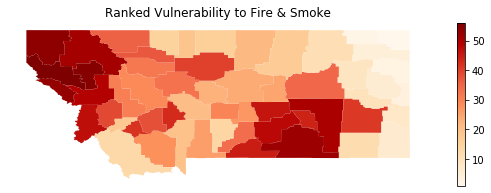

In [19]:
ax = gdf.plot(column='vul_rank', cmap='OrRd', legend=True, figsize=[10, 3])
# res_bounds.geometry.boundary.plot(ax=ax, color=None, edgecolor='k', linewidth=1)  # Add reservation boundaries
ax.set_title('Ranked Vulnerability to Fire & Smoke')
ax.axis('off')

In [20]:
fig = ax.get_figure()
fig.savefig("ranked_fire_smoke_vulnerability.png", bbox_inches="tight", dpi=300)